In [3]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [4]:
filepath = "Q4-analysis-input.in"
data = []
with open(filepath) as file:
    count = 0
    for line in file:
        if count == 0:
            dimension = int(line)
        if count == 1:
            num_patients = int(line)
        if count == 2:
            dist_metric = int(line)
        if count == 3:
            num_components = int(line)
        if count >= 4:
            l = line.split(' ')
            data.append([int(x) for x in l[:-1]])
        count += 1

data = np.asarray(data)

In [12]:
def get_distance(patient_a, patient_b, dist_metric):
    if dist_metric == 1:
        return sum(abs(patient_a - patient_b))
    elif dist_metric == 2:
        return sum((patient_a - patient_b)**2)**0.5
    elif dist_metric == 3:
        return max(abs(patient_a - patient_b))
    elif dist_metric == 4:
        return cosine(patient_a, patient_b)
    else:
        return None

def rank_patients(patient_P, patients, num_patients, dist_metric):
    index = range(num_patients)
    distance = []
    for i in index:
        dist = get_distance(patient_P, patients[i], dist_metric)
        distance.append(dist)
        
    sorted_index = [ind + 1 for dist, ind in sorted(zip(distance, index))]
    
    return sorted_index[0:5]

def transform_pca(data, num_components):
    pca = PCA(num_components)
    pca.fit(data)
    data_transformed = pca.transform(data)
    explained_var = sum(pca.explained_variance_ratio_)
    return data_transformed, explained_var

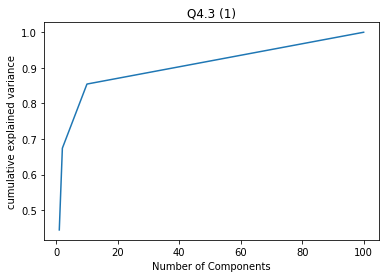

In [13]:
num_comp = [100, 10, 2, 1]
y_var = []
trans_data = []
for i in num_comp:
    tran_data,var = transform_pca(data, i)
    y_var.append(var)
    trans_data.append(tran_data)
plt.plot(num_comp,y_var)
plt.title('Q4.3 (1)')
plt.xlabel('Number of Components')
plt.ylabel('cumulative explained variance')
plt.show()

In [14]:
patient_P = data[0]
patients = data[1:]
for i in range(1,5):
    patient = rank_patients(patient_P, patients, num_patients, i)
    print(sorted(patient))

[19, 46, 54, 56, 94]
[19, 46, 54, 56, 94]
[16, 29, 75, 79, 86]
[19, 46, 54, 56, 94]


In [15]:
patient_P_100 = trans_data[0][0]
patients_100 = trans_data[0][1:]
for i in range(1,5):
    patient_100 = rank_patients(patient_P_100, patients_100, num_patients, i)
    print(sorted(patient_100))

[19, 54, 56, 94, 95]
[19, 46, 54, 56, 94]
[5, 19, 46, 54, 56]
[19, 46, 54, 56, 94]


In [16]:
patient_P_10 = trans_data[1][0]
patients_10 = trans_data[1][1:]
for i in range(1,5):
    patient_10 = rank_patients(patient_P_10, patients_10, num_patients, i)
    print(sorted(patient_10))

[19, 46, 54, 56, 94]
[19, 46, 54, 56, 94]
[19, 44, 46, 54, 94]
[19, 46, 54, 56, 94]


In [17]:
patient_P_2 = trans_data[2][0]
patients_2 = trans_data[2][1:]
for i in range(1,5):
    patient_2 = rank_patients(patient_P_2, patients_2, num_patients, i)
    print(sorted(patient_2))

[5, 44, 62, 70, 94]
[5, 44, 62, 70, 94]
[44, 62, 70, 91, 94]
[16, 44, 62, 70, 94]


In [18]:
patient_P_1 = trans_data[3][0]
patients_1 = trans_data[3][1:]
for i in range(1,5):
    patient_1 = rank_patients(patient_P_1, patients_1, num_patients, i)
    print(sorted(patient_1))

[16, 44, 62, 70, 94]
[16, 44, 62, 70, 94]
[16, 44, 62, 70, 94]
[5, 6, 10, 12, 14]
